In [164]:
import cv2
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil
import numpy as np
from sklearn.metrics import accuracy_score

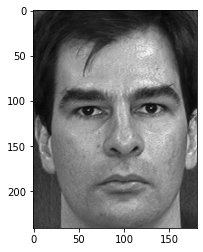

In [165]:
# pegando faces já recortadas do sujeito 1(s01), imagem 01 de 15
img_face_1 = cv2.imread("imgs/cropped_faces/s01_01.jpg")
img_face_1 = cv2.cvtColor(img_face_1, cv2.COLOR_BGR2RGB)
img_face_1_gray = cv2.cvtColor(img_face_1, cv2.COLOR_RGB2GRAY)

# sujeito 2
img_face_2 = cv2.imread("imgs/cropped_faces/s02_01.jpg")
img_face_2 = cv2.cvtColor(img_face_2, cv2.COLOR_BGR2RGB)
img_face_2_gray = cv2.cvtColor(img_face_2, cv2.COLOR_RGB2GRAY)

#sujeito 3
img_face_3 = cv2.imread("imgs/cropped_faces/s03_01.jpg")
img_face_3 = cv2.cvtColor(img_face_3, cv2.COLOR_BGR2RGB)
img_face_3_gray = cv2.cvtColor(img_face_2, cv2.COLOR_RGB2GRAY)

plt.imshow(img_face_1_gray, cmap="gray")

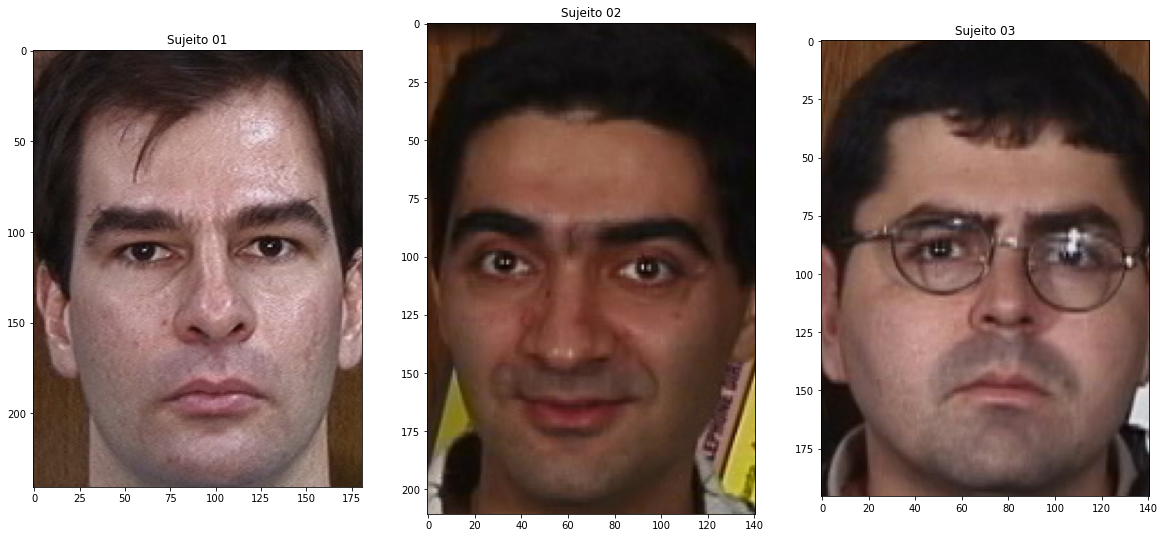

In [166]:
# imprimindo várias imagens lado a lado
plt.figure(figsize=(20,10))
# exibindo lado a lado, 1 linha e 3 colunas, posição 1
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(img_face_1)
#sujeito 2
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(img_face_2)
# sujeito 3
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(img_face_3)

plt.show()

In [167]:
# separando as imagens em um conjunto de testes e outro de treino
# como são 15 imagens por pessoa, 10 para treino e 5 para teste
faces_path = "imgs/cropped_faces/"
faces_files_list = [f for f in listdir(faces_path) if isfile(join(faces_path, f))]

faces_files_list[0]

's20_10.jpg'

In [168]:
faces_path_treino = "imgs/treino/"
faces_path_teste = "imgs/teste/"

# cria os diretorios para separar as imagens de treino e teste
if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)
    
if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

# arquivos no formato s01_10
for file in faces_files_list:
    sujeito = file[1:3] #01
    numero = file[4:6]  #10
    
    # 1 a 10 para treino
    if int(numero) <= 10:
        shutil.copyfile(faces_path + file, faces_path_treino + file)
    else:
        shutil.copyfile(faces_path + file, faces_path_teste + file)

In [169]:
# Padronizando as imagens agora
# É melhor que elas tenham o mesmo tamanho e estejam em escala de cinza
def padronizar_imagem(img_path):
    imagem = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  #IMREAD_GRAYSCALE carrega a imagem já em escala de cinza
    # imagem, tamanho desejado, interpolação (algoritmo que será usado caso imagem precise ser aumentada)
    # lanczos4 é um dos melhores para não perder dados ao aumentar
    imagem = cv2.resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

list_faces_treino = [file for file in listdir(faces_path_treino) if isfile(join(faces_path_treino, file))]
list_faces_teste = [file for file in listdir(faces_path_teste) if isfile(join(faces_path_teste, file))]

print("treino: " + list_faces_treino[0], "\nteste: " + list_faces_teste[3])

treino: s20_10.jpg 
teste: s13_12.jpg


In [170]:
# preparando os dados para o treino
dados_treino, sujeitos_treino = [], []
for i, arq in enumerate(list_faces_treino):
    img_path = faces_path_treino + arq
    imagem = padronizar_imagem(img_path)
    dados_treino.append(imagem)
    
    # isso gera os resultados para os treinos
    sujeito = arq[1:3]
    sujeitos_treino.append(int(sujeito))
    
print("treino: " + str(len(dados_treino)), " sujeitos: " + str(len(sujeitos_treino)))

dados_teste, sujeitos_teste = [], []
for i, arq in enumerate(list_faces_teste):
    img_path = faces_path_teste + arq
    imagem = padronizar_imagem(img_path)
    dados_teste.append(imagem)
    
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))
    
print("teste: " + str(len(dados_teste)), " sujeitos: " + str(len(sujeitos_teste)))

treino: 600  sujeitos: 600
teste: 300  sujeitos: 300


In [171]:
# o modelo de reconhecimento facial recebe arrays de 32bits do numpy
# então precisamos converter as listas de sujeitos
sujeitos_treino = np.asarray(sujeitos_treino, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [172]:
# modelo eigenface faz o reconhecimento facial
modelo_eigenface = cv2.face.EigenFaceRecognizer_create()
modelo_eigenface.train(dados_treino, sujeitos_treino)

In [173]:
# sujeito 15 é problematico
sujeito1 = 12
sujeito2 = 15

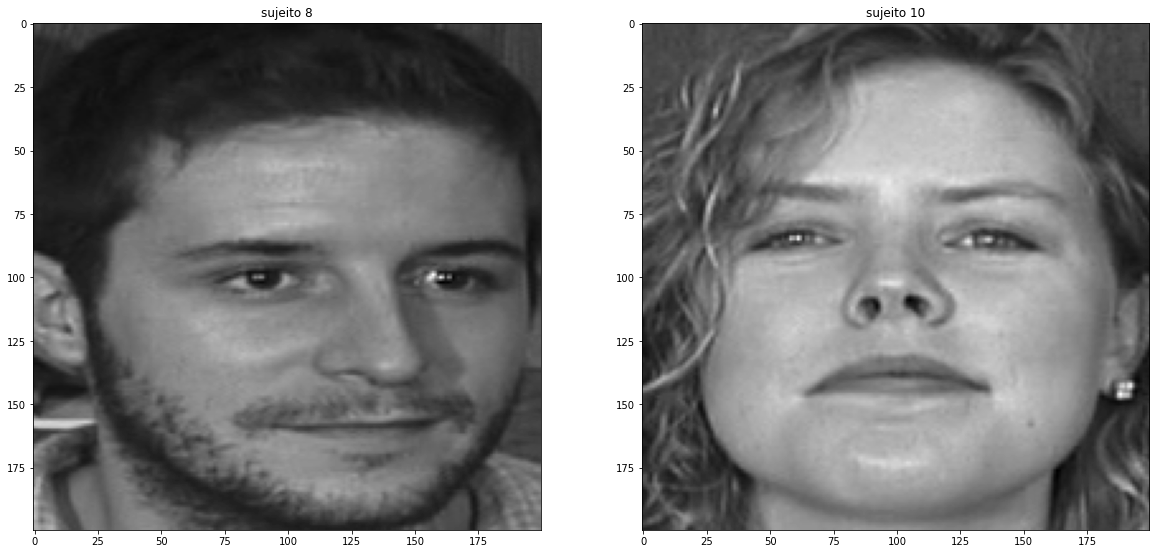

In [174]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("sujeito " + str(sujeitos_teste[sujeito1]))
plt.imshow(dados_teste[sujeito1], cmap="gray")

plt.subplot(122)
plt.title("sujeito " + str(sujeitos_teste[sujeito2]))
plt.imshow(dados_teste[sujeito2], cmap="gray")

In [175]:
predicao_eigen_1 = modelo_eigenface.predict(dados_teste[sujeito1])
predicao_eigen_2 = modelo_eigenface.predict(dados_teste[sujeito2])

print("o primeiro valor é a predicao, o segundo é o grau de certeza. Quanto menor melhor")
print("predicao eigen 1: " + str(predicao_eigen_1))
print("predicao eigen 2: " + str(predicao_eigen_2))

o primeiro valor é a predicao, o segundo é o grau de certeza. Quanto menor melhor
predicao eigen 1: (8, 4310.344802864342)
predicao eigen 2: (10, 4965.419080512216)


In [176]:
# fisherface é um modelo mais robusto, costuma acertar mais
modelo_fisherface = cv2.face.FisherFaceRecognizer_create()
modelo_fisherface.train(dados_treino, sujeitos_treino)

In [177]:
predicao_fisher_1 = modelo_fisherface.predict(dados_teste[sujeito1])
predicao_fisher_2 = modelo_fisherface.predict(dados_teste[sujeito2]) 

print("o primeiro valor é a predicao, o segundo é o grau de certeza. Quanto menor melhor")
print("predicao fisher 1: " + str(predicao_fisher_1))
print("predicao fisher 2: " + str(predicao_fisher_2))

o primeiro valor é a predicao, o segundo é o grau de certeza. Quanto menor melhor
predicao fisher 1: (8, 751.2754015382302)
predicao fisher 2: (32, 922.4361480651104)


In [178]:
print("predicao eigen 1: " + str(predicao_eigen_1))
print("predicao eigen 2: " + str(predicao_eigen_2))
print("predicao fisher 1: " + str(predicao_fisher_1))
print("predicao fisher 2: " + str(predicao_fisher_2))

predicao eigen 1: (8, 4310.344802864342)
predicao eigen 2: (10, 4965.419080512216)
predicao fisher 1: (8, 751.2754015382302)
predicao fisher 2: (32, 922.4361480651104)


In [179]:
# modelo ainda mais robusto que o fisherface é o lbph
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()
modelo_lbph.train(dados_treino, sujeitos_treino)

eigen 1: (29, 4707.034467302013)
eigen 2: (37, 5259.845131889723)
fisher 1: (29, 864.5032294514552)
fisher 2: (25, 950.2218082302674)
lbph 1: (29, 33.71000122343612)
lbph 2: (37, 41.45307301688168)


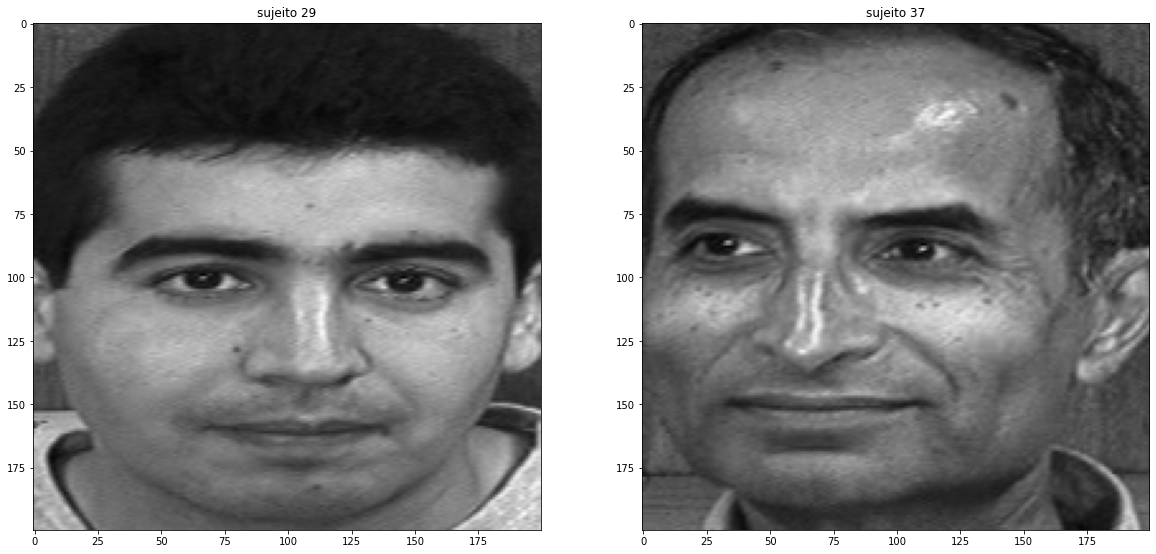

In [180]:
# reproduzindo todos e comparando

# sujeito 15 é problematico
sujeito1 = 27
sujeito2 = 21

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("sujeito " + str(sujeitos_teste[sujeito1]))
plt.imshow(dados_teste[sujeito1], cmap="gray")

plt.subplot(122)
plt.title("sujeito " + str(sujeitos_teste[sujeito2]))
plt.imshow(dados_teste[sujeito2], cmap="gray")

predicao_eigen_1 = modelo_eigenface.predict(dados_teste[sujeito1])
predicao_eigen_2 = modelo_eigenface.predict(dados_teste[sujeito2])

predicao_fisher_1 = modelo_fisherface.predict(dados_teste[sujeito1])
predicao_fisher_2 = modelo_fisherface.predict(dados_teste[sujeito2])

predicao_lbph_1 = modelo_lbph.predict(dados_teste[sujeito1])
predicao_lbph_2 = modelo_lbph.predict(dados_teste[sujeito2])

print("eigen 1: " + str(predicao_eigen_1))
print("eigen 2: " + str(predicao_eigen_2))

print("fisher 1: " + str(predicao_fisher_1))
print("fisher 2: " + str(predicao_fisher_2))

print("lbph 1: " + str(predicao_lbph_1))
print("lbph 2: " + str(predicao_lbph_2))

In [181]:
# Testando a acuracia de cada modelo
y_pred_eigen = []
for item in dados_teste:
    y_pred_eigen.append(modelo_eigenface.predict(item)[0])
    
y_pred_fisher = []
for item in dados_teste:
    y_pred_fisher.append(modelo_fisherface.predict(item)[0])
    
y_pred_lbph = []
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

In [182]:
acuracia_eigen = accuracy_score(sujeitos_teste, y_pred_eigen)
acuracia_fisher = accuracy_score(sujeitos_teste, y_pred_fisher)
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)

print("eigen: " + str(acuracia_eigen))
print("fisher: " + str(acuracia_fisher))
print("lbph: " + str(acuracia_lbph))

eigen: 0.8933333333333333
fisher: 0.8
lbph: 0.92


In [42]:
# Conclusão
import cv2
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil
import numpy as np
from sklearn.metrics import accuracy_score

    
def prepare_training_test_data(images_folder, target_folder):
    divide_test_train_images(images_folder, target_folder)
    
    training_images = get_training_images(target_folder)
    test_images = get_test_images(target_folder)
    
    training_data, training_results = prepare_data(training_images, target_folder + "training/")
    test_data, test_results = prepare_data(test_images, target_folder + "test/")
    
    training_results, test_results = convert_to_int32(training_results, test_results)
    
    return training_data, training_results, test_data, test_results



def divide_test_train_images(images_folder, target_folder):
    create_test_train_directories(target_folder)
    images = get_images_from_folder(images_folder)
    # files must be formated as s01_10
    for image in images:
        add_image_to_right_folder(image, images_folder, target_folder)
        

def create_test_train_directories(target_folder):
    training_images_folder = target_folder + "training/"
    test_images_folder = target_folder + "test/"
    
    if not path.exists(training_images_folder):
        makedirs(training_images_folder)
    
    if not path.exists(test_images_folder):
        makedirs(test_images_folder)
        


def get_images_from_folder(folder_path):
    images_list = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    return images_list



def add_image_to_right_folder(image, images_folder, target_folder):
    number = image[4:6]

    if int(number) <= 10:
        shutil.copyfile(images_folder + image, target_folder + "training/" + image)
    else:
        shutil.copyfile(images_folder + image, target_folder + "test/" + image)
            
            
            
def get_training_images(folder):
    training_images = [file for file in listdir(join(folder, "training/")) if isfile(join(folder, "training/", file))]
    return training_images



def get_test_images(folder):
    test_images = [file for file in listdir(join(folder, "test/")) if isfile(join(folder, "test/", file))]
    return test_images
    

            
def get_rgb_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image



def prepare_data(images, folder):
    
    data, results = [], []
    for i, file in enumerate(images):
        img_path = folder + file
        image = homogenize_images(img_path)
        data.append(image)

        result = file[1:3]
        results.append(int(result))
        
    return data, results
    


def homogenize_images(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return image



def convert_to_int32(training_results, test_results):
    training_results = np.asarray(training_results, dtype=np.int32)
    test_results = np.asarray(test_results, dtype=np.int32)
    
    return training_results, test_results

    

training_data, training_results, test_data, test_results = prepare_training_test_data("imgs/cropped_faces/", "imgs/")
  
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()
modelo_lbph.train(training_data, training_results)
predict = modelo_lbph.predict(test_data[172])
print("model: " + str(predict), " expected: " + str(test_results[172]))



model: (38, 26.093606791020683)  expected: 38
